<h2 style='color:blue' align='center'>Implementation of stochastic and batch grandient descent in python</h2>

#### We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses *all* training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick *one* training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use *all* training samples where as stochastic GD will use one randomly picked training sample

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

##### Load the dataset in pandas dataframe

In [23]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
9,3700,5,167.0
3,1521,3,75.0
7,3300,4,155.0
5,1170,2,38.0


##### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

The difference in reshaping between X and y in your code is due to the way the data is structured and how the fit_transform() function from Scikit-learn works.

When you do df.drop('price',axis='columns'), it returns a DataFrame which is essentially a 2D structure with rows and columns. So, you don’t need to reshape it before passing to fit_transform().

On the other hand, when you do df['price'].values, it returns a 1D numpy array. Many Scikit-learn functions including fit_transform() expect the input to be a 2D array (even if one of the dimensions is just 1). So, you need to reshape this 1D array to a 2D array before passing it to fit_transform(). That’s why you see df['price'].values.reshape(df.shape[0],1) for y.

In summary, X is already in 2D after dropping the ‘price’ column, so no need to reshape. But y is initially in 1D after selecting the ‘price’ column, so it needs to be reshaped to 2D. I hope this clarifies your question! 😊

In [24]:
df.price.values

array([ 39.07, 120.  ,  62.  ,  75.  ,  51.  ,  38.  , 135.  , 155.  ,
        50.  , 167.  ,  82.  , 140.  ,  38.  ,  40.  , 101.  ,  42.  ,
        48.  ,  60.  , 102.  ,  32.  ])

In [25]:
df.price.values.reshape(-1, 1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

reshape() is a numpy method.

The difference between df['price'].values.reshape(df.shape[0],1) and df['price'].values.reshape(-1,1) lies in how the reshape function is used:

df['price'].values.reshape(df.shape[0],1): This reshapes the ‘price’ values into a 2D array with df.shape[0] rows and 1 column. df.shape[0] returns the number of rows in the dataframe df.
df['price'].values.reshape(-1,1): This also reshapes the ‘price’ values into a 2D array with 1 column. However, -1 is used as a placeholder for the size that can be automatically inferred based on the length of the array and the remaining dimensions. In this case, it will also end up being the number of rows in the dataframe df.
So, in both cases, the result is the same: a 2D array with the same number of rows as df and 1 column. The -1 is just a convenient way to automatically infer the size without having to explicitly specify it. I hope this helps!

In [26]:
# fit_transform()はスケールする。
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
#scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y = sy.fit_transform(df['price'].values.reshape(-1,1))
#scaled_y = sy.fit_transform(df['price'])

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [27]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

Yes, the fit_transform() method in Scikit-learn generally expects its input to be a two-dimensional array. This is because most machine learning algorithms in Scikit-learn are designed to work with multiple features at once, which are typically represented as a 2D array where each row is an instance and each column is a feature.

If you try to pass a one-dimensional array to fit_transform(), you might get an error. In such cases, you would need to reshape your data to 2 dimensions.

So, in your code, when you’re calling fit_transform() on df['price'].values, you need to reshape it to a 2D array using reshape(-1, 1) or reshape(df.shape[0], 1). This is because df['price'].values returns a 1D array, and fit_transform() needs a 2D array.

I hope this answers your question! Let me know if you have any other questions. 😊

In [28]:
# Since df.price has 20 rows, when you reshape (20, ) means 20 rows one column.
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

The difference between y.reshape(20,) and y.reshape(20,1) lies in the shape of the resulting array:

y.reshape(20,): This will return a 1D array with 20 elements. The comma following the 20 is optional and is often included for clarity, but y.reshape(20) would do the same thing1.
y.reshape(20,1): This will return a 2D array with 20 rows and 1 column1. Even though it still contains 20 elements like the 1D array, it’s now considered a column vector in a 2D space1.
In summary, y.reshape(20,) results in a 1D array (or a flat array), while y.reshape(20,1) results in a 2D array (or a column vector). The choice between the two depends on the requirements of the specific operations you’re performing. Some functions in libraries like NumPy and Scikit-learn may require one shape or the other1.

I hope this helps! Let me know if you have any other questions. 😊

##### Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

<img src="hp.jpg"/>

##### Now is the time to implement mini batch gradient descent. 

The line number_of_features = X.shape[1] is used to get the number of features in the dataset X.

Here’s a breakdown:

X.shape: This is a tuple that gives you the shape of the array X. If X is a 2D array representing your dataset, X.shape will return a tuple (n, m), where n is the number of instances (rows) and m is the number of features (columns).
X.shape[1]: This accesses the second element of the shape tuple, which represents the number of features (columns) in X.
So, number_of_features = X.shape[1] is storing the number of features in the variable number_of_features. This can be useful for later operations that need to know the number of features in your dataset.

I hope this helps! Let me know if you have any other questions. 😊

In [29]:
np.ones(shape=(2))

array([1., 1.])

Above array([1., 1.]), first 1. is w1 and second 1. is w2.

Sure, np.ones(shape=(2)) is a function call in NumPy, a library in Python that’s used for numerical computations.

Here’s what it does:

np.ones(): This function returns a new array of given shape and type, filled with ones.
shape=(2): This is an argument to the np.ones() function. It defines the shape of the new array. In this case, it’s creating a 1D array with 2 elements.
So, np.ones(shape=(2)) will return a 1D array with 2 elements, all of which are 1. Here’s what the output would look like:

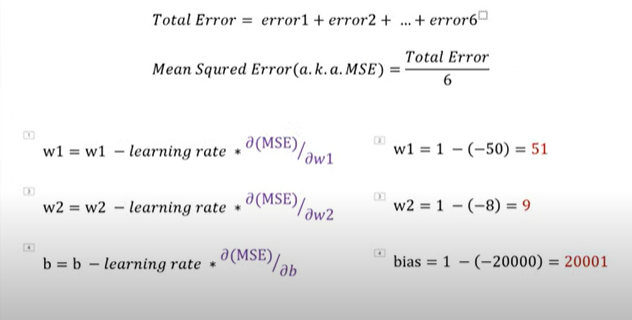

In [53]:
# learning_rate controls how fast you want to learn.
# X is the same as X_true (X_train).
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

###### Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
w1 = 0.66469087
w2 = 0.60541671
bias = -0.17792104056392882

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

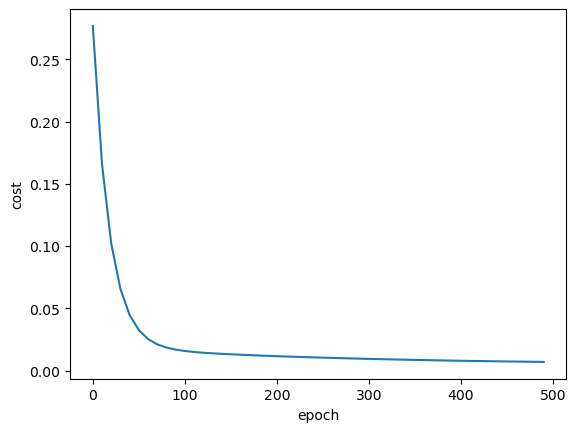

In [31]:
# Use SKLearn's plt.
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

###### Lets do some predictions now. 

In [32]:
sx.transform([[2600, 4]])

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [33]:
sy.inverse_transform([[1,0]])

array([[167.,  32.]])

In [34]:
def predict(area,bedrooms,w,b):
    # you need [0] because you wnat the first element of two dimentional array.
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    # inverse_transform changes back to original number.
    # you will need [0][0] because of the 2 \D array.
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [35]:
predict(1000,2,w,b)

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [36]:
predict(1500,3,w,b)

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

<h3 style='color:purple'>(2) Stochastic Gradient Descent Implementation</h3>

#### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [37]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

2

In [39]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71006827, 0.67441196]), -0.2324756321294624, 0.011403767760603149)

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [40]:
w , b 

(array([0.70712464, 0.67456527]), -0.23034857438407427)

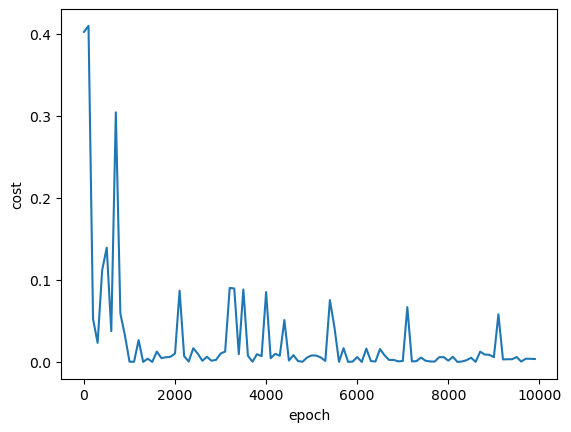

In [41]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [42]:
predict(2600,4,w_sgd, b_sgd) 

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.39882509669872

In [43]:
predict(1000,2,w_sgd, b_sgd)

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


29.988173857883314

In [44]:
predict(1500,3,w_sgd, b_sgd)

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.27702876526754

<h3 style='color:purple'>Exercise</h3>

#### Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples



In [68]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]# number of rows in X
    
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        j = random.randint(0,total_samples-1)
        total_samples = total_samples/(random.randint(1,total_samples-1))
        sample_x = X[j:total_samples]
        sample_y = y_true[j:total_samples]
        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

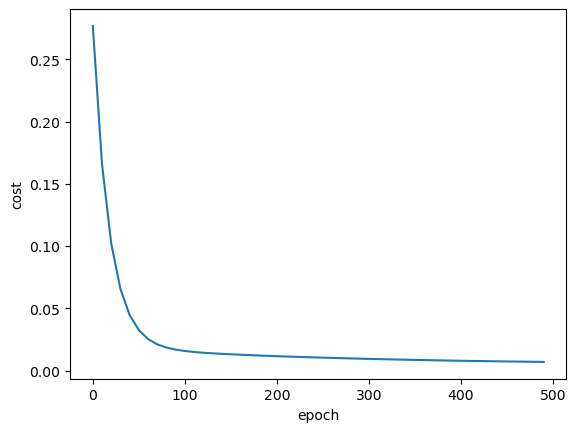

In [69]:
# Use SKLearn's plt.
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [59]:
predict(2600,4,w_sgd, b_sgd)

C:\Users\keiko\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.39882509669872

In [45]:
import random

# List from which to draw samples
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Number of samples to draw
num_samples = 3

# Draw samples
samples = random.sample(my_list, num_samples)

print(samples)

[3, 9, 6]


In [48]:
num_samples = random.randint(0,100)
num_samples

54

[Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/8_sgd_vs_gd/mini_batch_gd.ipynb)